Basic Neural Net

Feed Forward Neural Net (shallow learning) aka multilayer preceptron

https://en.wikipedia.org/wiki/Feedforward_neural_network

4 input nodes,  and classes
Hidden layer is between input and output layer(classes)

The feedforward neural network was the first and simplest type of artificial neural network devised.[2] In this network, the information moves in only one direction—forward—from the input nodes, through the hidden nodes (if any) and to the output nodes. There are no cycles or loops in the network

https://www.asimovinstitute.org/neural-network-zoo/

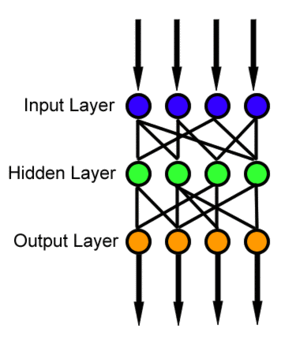

A single-layer neural network can compute a continuous output instead of a step function. A common choice is the so-called logistic function:
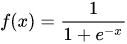

It has a continuous derivative, which allows it to be used in backpropagation. This function is also preferred because its derivative is easily calculated:

image.png

If single-layer neural network activation function is modulo 1, then this network can solve XOR problem with exactly ONE neuron.

image.png

image.png

As data tiggers activation functions in neural nets, the weights change to renforce that behaviour in neural nets
https://missinglink.ai/guides/neural-network-concepts/7-types-neural-network-activation-functions-right/

activation functions:
sigmoid
softmax
Tanh
soft sign
relu

https://machinelearningmastery.com/rectified-linear-activation-function-for-deep-learning-neural-networks/


Coding a shallow neural network with no backpropagation

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


In [ ]:
cmap_bold = ListedColormap(["#FF0000", "#00FF00", "#0000FF"])
cmap_light = ListedColormap(["#FFBBBB", "#BBFFBB", "#BBBBFF"])

Activation and helper Functions below

In [ ]:
def linear(H): #call if no activation function
  return H

def ReLU(H): #define relu function return H if positive else 0 if negative it will bool 0 or 1
  return H*(H>0)

def softmax(H): #activation function
  eH = np.exp(H)
  return eH/eH.sum(axis = 1, keepdims = True)

def  cross_entropy(Y,P_hat): #helper function
  return -np.sum(Y*np.log(P_hat))

def one_hot_encode(y): #helper function
  N = len(y)
  K = len(set(y))
  Y = np.zeros((N,K))

  for i in range (N):
    Y[i,y[i]] = 1
  return y

def accuracy (y,y_hat):
  return np.mean(y==y_hat)

def OLS(Y,Y_hat):
  return (1/(2*len(Y))*np.sum((Y-Y_hat)**2))

def R2(y,y_hat):
  return sqrt((y-y_hat)**2)




    

In [ ]:
class ANN():

  def __init__(self,mode=0):
    self.mode = mode

  def fit(self,X,y,neurons=10,eta=1e-3,epochs=1e3,show_curve=False):
    epochs = int(epochs)
    Y = one_hot_encode(y)

    N,D = X.shape
    K=Y.shape[1]

    #weights will be multi-dimensional before and after hidden layer, M is neurons
    self.W = {l:np.random.randn(M[0],M[1]) for l,M in enumerate(zip([D,neurons],[neurons,K]),1)}
    #b is bias
    self.b = {l: np.radom.randn(M) for l,M in enumerate([neurons,K],1)}


    #training the neural is it a regression or classification, training hidden layer and our output
    # mode to decide if we should use regression or classification this is our hidden layer to decide which to use based on data 
    if self.mode:
      self.a = {1:np.tanh,2:linear} #np.tanh = Compute hyperbolic tangent element-wise. if mode 1 do tanh else linear
    else:
      self.a = {1:np.tanh, 2: softmax}

    J = np.zeros(epochs)

    #graident descent step, choose which descent to use
    for epoch in range(epochs):
      self.forward(X)

      if self.mode:
        J[epoch] = OLS(Y,self.Z[2])

      else: 
        J[epoch] = cross_entropy(Y,self.Z[2])

    #update rules, Z is the result of each layer
    self.W[2] -= eta*(1/N)*(self.Z[1].T@(self.Z[2]-Y))
    self.b[2] -= eta*(1/N)*((self.Z[2]-Y).sum(axis=0))
    self.W[1] -= eta*(1/N)*X.T@((self.X[2]-Y)@self.W[2].T*(1-self.Z[1]**2))
    self.b[1] -= eta*(1/N)*((self.Z[2]-Y)@self.W[2].T*((1-self.Z[1]**2)).sum(axis=0))

    if show_curve:
      plt.figure()
      plt.plot(J)
      plt.xlabel("epochs")
      plt.ylabel("$\mathcal{J}$")
      plt.title("Training Curve")
      plt.show()

  def forward(self, X):
    self.Z = {0:X}

    for l in sorted(self.W.keys()):
      self.Z[l] = self.a[l](self.Z[l - 1]@self.W[l]+self.b[l])


  
  
  
  def predict(self,X):
    self.forward(X)

    if self.mode:
      return self.Z[2]
    else:
      return self.Z[2].argmax(axis=1)
































In [73]:
def main():
    D = 2
    K = 3
    N = int(K*1e3)
    
    X0 = np.random.randn((N//K),D) + np.array([2,2])
    X1 = np.random.randn((N//K),D) + np.array([0,-2])
    X2 = np.random.randn((N//K),D) + np.array([-2,2])
    X = np.vstack((X0,X1,X2))
    
    y = np.array([0]*(N//K) + [1]*(N//K) + [2]*(N//K))
    
    myAnn = ANN()
    myAnn.fit(X,y, neurons=20, eta=3e-2, epochs=2e3, show_curve=True)
    y_hat = myAnn.predict(X)
    
    print(f"Training Accuracy: {accuracy(y,y_hat):0.4f}")
          
    x1 = np.linspace(X[:,0].min() -1, X[:,0].max(), 1000)
    x2 = np.linspace(X[:,1].min() -1, X[:,1].max(), 1000)
    
    xx1,xx2 = np.meshgrid(x1,x2)
    Z = myAnn.predict(np.c_[xx1.ravel(), xx2.ravel()]).reshape(*xx1.shape)
    
    plt.figure()
    plt.scatter(X[:,0],X[:1],c=y, cmap=cmap_bold)
    plt.title(" Data ")
    
    plt.figure()
    plt.scatter(X[:,0],X[:1],c=y_hat, cmap=cmap_bold)
    plt.title(" Prediction ")
    plt.colormesh(xx1,xx2,Z, cmap=cmap_light)
    plt.show()

In [74]:
if __name__ == "__main__":
  main()


IndexError: ignored